# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import scipy.stats
import seaborn as sns
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets


In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Users/Yihan/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


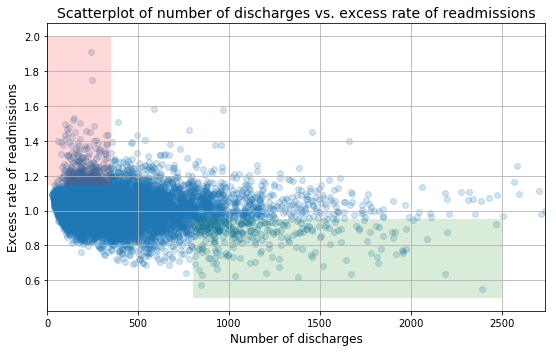

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
<div class="span5 alert alert-info">
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?

B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

# A. Initial Observations:

Overall, it is not very clear that the readmissions is trending down with increasing number of discarges becauseexcess rate of readmission is clustered around(.8, 1.2) when number of discarges are low(<1000). The pattern is not clear.
   

# B. Statistics:

### 1) Population statistics

In [5]:
# Your turn columns = ['column1', 'column2'])

In [6]:
df = clean_hospital_read_df.loc[:,['Number of Discharges', 'Excess Readmission Ratio']]

In [7]:
len(df)

11578

In [8]:
df_na = df.dropna()

In [9]:
len(df_na)

11497

In [10]:
less100 = df_na[df_na['Number of Discharges']<100]

In [11]:
less100.mean()

Number of Discharges        74.717172
Excess Readmission Ratio     1.022618
dtype: float64

In [12]:
len(less100[less100["Excess Readmission Ratio"]>1])/len(less100)

0.6321548821548821

In [13]:
more1000 = df_na[df_na['Number of Discharges']>1000]

In [14]:
more1000.mean()

Number of Discharges        1383.427646
Excess Readmission Ratio       0.978335
dtype: float64

In [15]:
len(more1000[more1000["Excess Readmission Ratio"]>1])/len(more1000)

0.4449244060475162

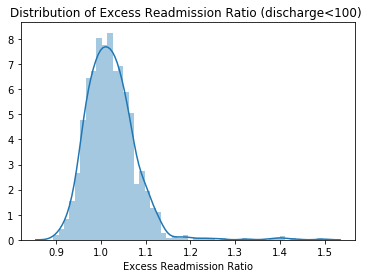

In [16]:
#histogram of excess ratio when number of discharges less than 100
sns.distplot(less100["Excess Readmission Ratio"],bins=50)
plt.title("Distribution of Excess Readmission Ratio (discharge<100) ")
plt.show()


In [17]:
# check if it is normally distributed
scipy.stats.shapiro(less100["Excess Readmission Ratio"], a=None, reta=False)

(0.8789852261543274, 2.0061011417573848e-29)

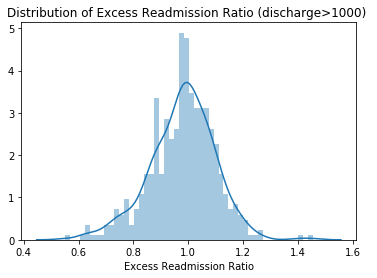

In [18]:
sns.distplot(more1000["Excess Readmission Ratio"],bins=50)
plt.title("Distribution of Excess Readmission Ratio (discharge>1000) ")
plt.show()

In [19]:
scipy.stats.shapiro(more1000["Excess Readmission Ratio"], a=None, reta=False)

(0.9844423532485962, 7.264906162163243e-05)

In [20]:
scipy.stats.ttest_1samp(less100["Excess Readmission Ratio"], 1.023, nan_policy='propagate')

Ttest_1sampResult(statistic=-0.22688487593546766, pvalue=0.82055232956663438)

In [21]:
less_mu = less100["Excess Readmission Ratio"].mean()
less_std = less100["Excess Readmission Ratio"].std()
print("less than 100 mean, std: ", less_mu, less_std)

less than 100 mean, std:  1.0226183501683506 0.05797860323426279


In [22]:
scipy.stats.t.interval(.99,len( less100["Excess Readmission Ratio"])-1,loc=less_mu,scale =less_std)

(0.87303485394791536, 1.1722018463887858)

In [23]:
scipy.stats.ttest_1samp(more1000["Excess Readmission Ratio"], .978, nan_policy='propagate')

Ttest_1sampResult(statistic=0.060141340211380609, pvalue=0.9520690709318147)

In [24]:
more_mu = more1000["Excess Readmission Ratio"].mean()
more_std = more1000["Excess Readmission Ratio"].std()
print("more than 1000 mean, std: ", more_mu, more_std)

more than 1000 mean, std:  0.9783354211663071 0.12000735348224047


In [25]:
scipy.stats.t.interval(.99,len( more1000["Excess Readmission Ratio"])-1,loc=more_mu,scale =more_std)

(0.66793487772776428, 1.28873596460485)

### 2) Resample & Hypothesis Test

In [26]:
def text(x, y, s):
    """Plot a string at a given location in axis coordinates.
    
    x: coordinate
    y: coordinate
    s: string
    """
    ax = plt.gca()
    plt.text(x, y, s,
                horizontalalignment='left',
                verticalalignment='top',
                transform=ax.transAxes)

In [27]:
# resampling: 
# use the sample itself as a model of the population distribution and draw samples from it.
class Resampler(object):
    """Represents a framework for computing sampling distributions."""
    
    def __init__(self, sample, xlim=None):
        """Stores the actual sample."""
        self.sample = sample
        self.n = len(sample)
        self.xlim = xlim
        
    def resample(self):
        """Generates a new sample by choosing from the original
        sample with replacement.
        """
        new_sample = np.random.choice(self.sample, self.n, replace=True)
        return new_sample
    
    def sample_stat(self, sample):
        """Computes a sample statistic using the original sample or a
        simulated sample.
        """
        return len(sample[sample>1])/len(sample)
    
    def compute_sampling_distribution(self, iters=1000):
        """Simulates many experiments and collects the resulting sample
        statistics.
        """
        stats = [self.sample_stat(self.resample()) for i in range(iters)]
        return np.array(stats)
    
    def plot_sampling_distribution(self):
        """Plots the sampling distribution."""
        sample_stats = self.compute_sampling_distribution()
        se = sample_stats.std()
        ci = np.percentile(sample_stats, [.5, 99.5])
   
        plt.hist(sample_stats)
        plt.xlabel('sample proportion greater than 1')
        plt.xlim(self.xlim)
        text(0.03, 0.95, 'CI [%0.5f %0.5f]' % tuple(ci))
        text(0.03, 0.85, 'SE %0.4f' % se)
        
        plt.show()
        

In [28]:
def interact_func(n, xlim):
    sample = population.rvs(n)
    resampler = Resampler(sample, xlim=xlim)
    resampler.plot_sampling_distribution()

#### 2.1 Null Hypothesis: when number of discharges < 100, proportion of excess readmission rate greater than 1 is P = .44 , Alternative Hypothesis: P not equals .63

In [29]:

population = scipy.stats.norm(less100["Excess Readmission Ratio"].mean(), less100["Excess Readmission Ratio"].std())


In [30]:
dataname = less100["Excess Readmission Ratio"]

In [31]:
# The sample mean with confidence interval and standard error.
slider = widgets.IntSlider(min=1000, max=10000, value=5000)
interact(interact_func, n=slider, xlim=fixed([0.6, .7]))
None



Widget Javascript not detected.  It may not be installed or enabled properly.


#### 2.2 Null Hypothesis: when number of discharges > 1000, proportion of excess readmission rate greater than 1 is P = .44  Alternative Hypothesis: P not equals .44

In [32]:
population = scipy.stats.norm(more1000["Excess Readmission Ratio"].mean(), more1000["Excess Readmission Ratio"].std())

In [33]:
dataname = more1000["Excess Readmission Ratio"]

In [34]:
# The sample mean with confidence interval and standard error.
slider = widgets.IntSlider(min=1000, max=10000, value=5000)
interact(interact_func, n=slider, xlim=fixed([0.4, .45]))
None

Widget Javascript not detected.  It may not be installed or enabled properly.


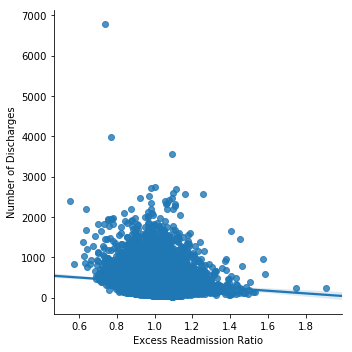

In [35]:
sns.lmplot(y='Number of Discharges', x="Excess Readmission Ratio",ci=99, data=df_na)

## Statistics Summary
The original dataset has length of 11578, after drop the missing data, the dataset has length of 11497.
When Number of Discharges less than 100, mean of Excess Readmission Ratio is 1.022618 and the proportion of Excess readimission ration bigger than 1 is .63215. Histogram and Shapiro Ratio indicate that excess Readmission Ratio is normally distributed (pvalue<.001). Use one sample t test to test null hypothesis that mean of excess readmission ration is 1.023. pvalue is .82>.01, so accept the null hypothesis and conclude that mean is 1.023. The 99% confidence interval for mean of excess redadmission is (0.87303485394791536, 1.1722018463887858).  (When simulate 1000 times and draw 5000 values from sample) 99% confidence interval for proportion that Excess Readmission Ratio less than one is [.6472, .6772], therefore, reject the null hypothesis that proportion is .63

When Number of Discharges more than 1000, mean of Excess Readmission Ratio is .97833, and the proportion of Excess Readmission Ratio bigger than 1 is .44492. Histogram and Shapiro Ratio indicate that excess Readmission Ratio is normally distributed (pvalue<.001).Use one sample t test to test null hypothesis that mean of excess readmission ration is .978. p-value is .82>.01, so accept the null hypothesis and conclude that mean is .978. The 99% confidence interval for mean of excess redadmission is (0.66793487772776428, 1.28873596460485). (When simulate 1000 times and draw 5000 values from sample) 99% confidence interval for proportion that Excess Readmission Ratio less than one is [.407, .4434], therefore, accept the null hypothesis that proportion is .44

## C. Conclusions
Null hypothesis:the slope of linear regression between two variables is zero
Alternative Hypothesis: slope is not 0

In [36]:
scipy.stats.linregress(x=df_na["Excess Readmission Ratio"],y=df_na['Number of Discharges'])

LinregressResult(slope=-326.99725041218733, intercept=694.91717559182632, rvalue=-0.097397943510793519, pvalue=1.2225473776734486e-25, stderr=31.165209901059395)

## Conclusion summary
There is a significant correlation between hospital capacity (number of discharges) and readmission rates. Null hypothesis that the slope of linear regression between two variables is zero, p-value < .001, therefore, reject the null hypothesis, and conclude there is significant correlation between two variables. The negative slope in the graph and calculated least square linear regression(slope=-326.99725041218733) indicate negavtive correlation between hospital capacity (number of discharges) and readmission rates. Therefore, we can infer that smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions, but the reason is not clear.


# D. Regulatory policy recommendations

#### Null Hypothesis: groups Number of Discharges < 300 v.s. >=300 has same mean

In [37]:
less300=df_na[df_na['Number of Discharges']<300]
more300 = df_na[df_na['Number of Discharges']>=300]
less = scipy.stats.norm(less300["Excess Readmission Ratio"].mean(), less300["Excess Readmission Ratio"].std()).rvs(1000)
more = scipy.stats.norm(more300["Excess Readmission Ratio"].mean(), more300["Excess Readmission Ratio"].std()).rvs(1000)

In [38]:
scipy.stats.ttest_ind(less300["Excess Readmission Ratio"], more300["Excess Readmission Ratio"], axis=0, equal_var=False, nan_policy='propagate')

Ttest_indResult(statistic=8.2797063680112473, pvalue=1.3862099593114599e-16)

In [39]:
scipy.stats.ttest_ind(less, more, axis=0, equal_var=False, nan_policy='propagate')

Ttest_indResult(statistic=3.1715249173941742, pvalue=0.0015402457605711373)

Conclusion: group mean is different 

In [40]:
df_na1=  df_na[df_na['Number of Discharges']<300]
df_na1.loc[:,"size"]="small"
df_na2=  df_na[df_na['Number of Discharges'].isin(range(300,800))]
df_na2.loc[:,"size"]="middle"
df_na3=  df_na[df_na['Number of Discharges']>=800]
df_na3.loc[:,"size"]="large"
df_na_all = pd.concat([df_na1,df_na2,df_na3])

        

/Users/Yihan/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/Yihan/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [41]:
s= df_na1["Excess Readmission Ratio"].mean()
m= df_na2["Excess Readmission Ratio"].mean()
l= df_na3["Excess Readmission Ratio"].mean()
print(s,m,l)

1.0142382121807445 1.0027424654480597 0.9856049833887043


In [42]:
df_na_all.tail(5)

,Number of Discharges,Excess Readmission Ratio,size
8126,2716,0.9804,large
6643,2740,1.0003,large
1892,3570,1.0896,large
13615,3980,0.7682,large
13666,6793,0.7379,large


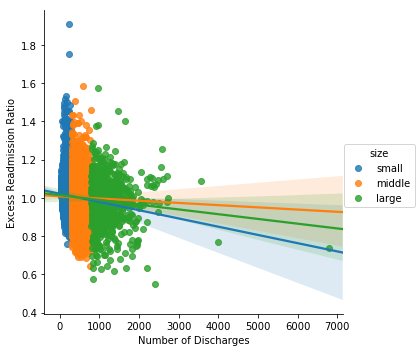

In [43]:
sns.lmplot(x='Number of Discharges', y="Excess Readmission Ratio", hue = "size", ci=99, data=df_na_all)

### D. Conclusions
The plot suggest that the negative relationship between excess readmission ratio and number of discharges are strongest for small sized hospitals(<300), followed by big siezed (>800), and then middle sized(300-800).
Becasuse of negative correlations showed in the plot above, we recommand hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation. Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges. However, more factors other than number of discharges in the hospital should be considered. Becasue middle siezed hospital has the flattest slope of the regression between excess readmission ratio and number of discharges, by upgrade resource, a middle sized hosital has less effect in decreasing excess readmission ratio than a smaller sized or large sized hospital. Therefore, a optimal capacity should be considered.

# E. Other topics

###  1. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?


In [44]:
def CohenEffectSize(group1, group2):
    """Compute Cohen's d.

    group1: Series or NumPy array
    group2: Series or NumPy array

    returns: float
    """
    diff = group1.mean() - group2.mean()

    n1, n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

In [45]:
def Difference(group1, group2):
    return abs(group1.mean()-group2.mean())

In [46]:
class CohenResampler(Resampler):
    def __init__(self, group1, group2, xlim=None):
        self.group1 = group1
        self.group2 = group2
        self.xlim = xlim
        
    def resample(self):
        n, m = len(self.group1), len(self.group2)
        group1 = np.random.choice(self.group1, n, replace=True)
        group2 = np.random.choice(self.group2, m, replace=True)
        return group1, group2
    
    def sample_stat(self, groups):
        group1, group2 = groups
        return CohenEffectSize(group1, group2)

In [47]:
def eval_pdf(rv, num=4):
    mean, std = rv.mean(), rv.std()
    xs = np.linspace(mean - num*std, mean + num*std, 100)
    ys = rv.pdf(xs)
    return xs, ys

def overlap_superiority(control, treatment, n=1000):
    """Estimates overlap and superiority based on a sample.
    
    control: scipy.stats rv object
    treatment: scipy.stats rv object
    n: sample size
    """
    control_sample = control.rvs(n)
    treatment_sample = treatment.rvs(n)
    thresh = (control.mean() + treatment.mean()) / 2
    
    control_above = sum(control_sample > thresh)
    treatment_below = sum(treatment_sample < thresh)
    overlap = (control_above + treatment_below) / n
    
    superiority = (treatment_sample > control_sample).mean()
    return overlap, superiority

def plot_pdfs(cohen_d=2):
    """Plot PDFs for distributions that differ by some number of stds.
    
    cohen_d: number of standard deviations between the means
    """
    control = scipy.stats.norm(0, 1)
    treatment = scipy.stats.norm(cohen_d, 1)
    xs, ys = eval_pdf(control)
    plt.fill_between(xs, ys, label='control', color='green', alpha=0.7)

    xs, ys = eval_pdf(treatment)
    plt.fill_between(xs, ys, label='treatment', color='yellow', alpha=0.7)
    
    o, s = overlap_superiority(control, treatment)
    plt.text(0, 0.05, 'overlap ' + str(o))
    plt.text(0, 0.15, 'superiority ' + str(s))
    plt.show()
    #print('overlap', o)
    #print('superiority', s)

In [48]:
Cohen_d = CohenEffectSize(less, more)
Cohen_d

0.14190587683808389

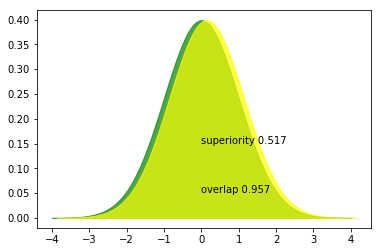

In [49]:
plot_pdfs(Cohen_d)

In [50]:
ci = np.percentile(Difference(more,less), [.5, 99.5])
ci

array([ 0.01350265,  0.01350265])

### Conclusion 1: 
Statistical significance itself doesn't imply that the results have practical consequence. If use a test with very high power, a small difference from the hypothesized value migt be  statistically significant. However, that small difference might be meaningless to. In this problem, the mean between two groups is statistically different with p-value less than .001. However, with cohen's d equal to .134772, 92.9% of two groups will overlap, and only 54.1% chance that a hospital picked at random from the big capicity group(>=300)  will have a higher score than a hospital picked at random from the small capicity group (<300). We need domain knowedge to decide of .01258 excess readmission rate is worthy to require small capacity (< 300) demonstrate upgraded resource allocation for quality care to continue operation. 

### 2. Look at the scatterplot:
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.

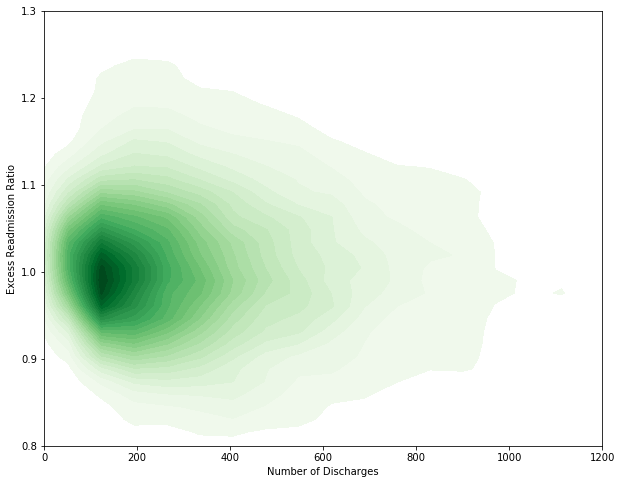

In [51]:
plt.figure(figsize=(10,8))
plt.xlim(0,1200)
plt.ylim(0.8,1.3)
sns.kdeplot(df_na['Number of Discharges'],df_na["Excess Readmission Ratio"], n_levels=30, cmap="Greens", shade=True, shade_lowest=False)

### Conclusion 2 :
Advantage of Scatter Graph:
Maintains exact data value in the graph plotting
The Graph is straightforward towards observation
By looking at the dots, it is clear to know where is data clustered at and the trends.

Disadvantage of Scatter Graph:
When there is large number of data, each observation is not clear. 